In [1]:
!pip3 install imageai --upgrade

Requirement already up-to-date: imageai in /usr/local/lib/python3.6/dist-packages (2.1.5)


In [2]:
from imageai.Detection import ObjectDetection
import cv2
from google.colab.patches import cv2_imshow

Using TensorFlow backend.


Create instance of Object Detection class

In [3]:
det = ObjectDetection()

Setting paths for input image, output image and pretrained model weights of tiny yolo

In [0]:
model_path = "yolo-tiny.h5"
input_path = "a.jpg"
output_path = "prediction_output.jpg"

Setting the model to tiny yolov3 and loading the weights from the specified path

In [5]:
det.setModelTypeAsTinyYOLOv3()
det.setModelPath(model_path)
det.loadModel()










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Detecting objects from the image and displaying the label if the prediction has minimum 0.1 probability.

In [0]:
detection = det.detectObjectsFromImage(input_image=input_path, output_image_path=output_path,minimum_percentage_probability=0.1)

Result: Input and output image

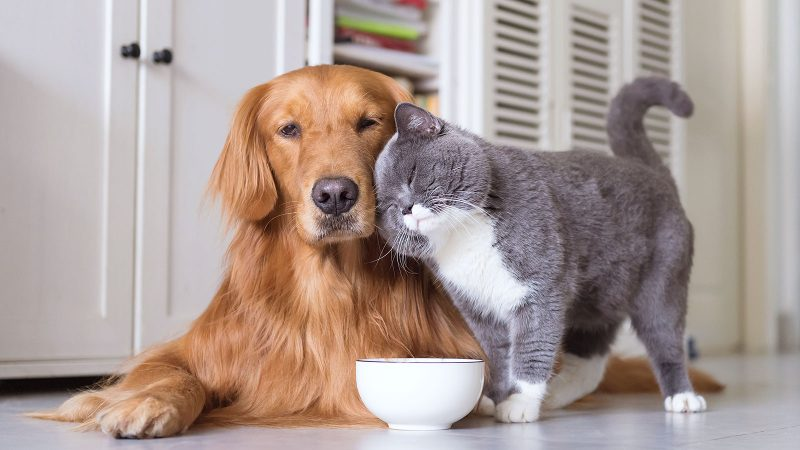

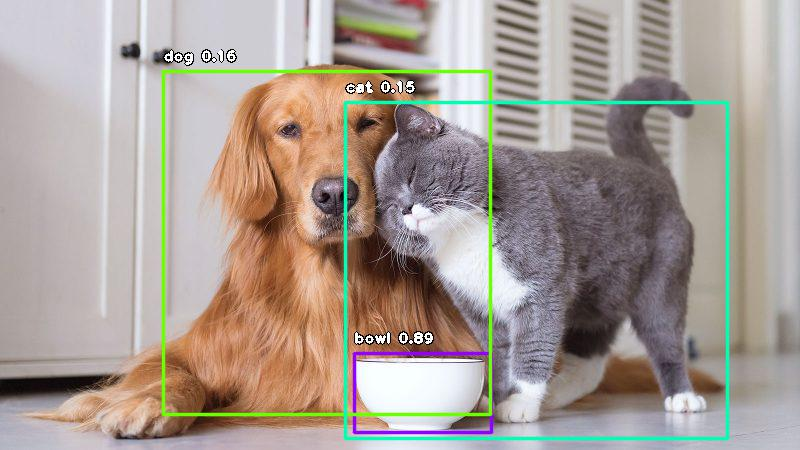

In [7]:
i1 = cv2.imread("a.jpg")
cv2_imshow(i1)
i2 = cv2.imread("prediction_output.jpg")
cv2_imshow(i2)

Total objects detected

In [8]:
print("Enter object name to get the box location")
print("Available options are:")
count = 1
for i in detection:
  print(count,') ', i['name'])
  count+=1

Enter object name to get the box location
Available options are:
1 )  bowl
2 )  dog
3 )  cat


Display requested object box dimensions

In [9]:
z = input()
for i in detection:
  if(i['name']==z):
    boxpix = i['box_points']
print("Top-left corner: (X1, Y1) = ({}, {})".format(boxpix[0],boxpix[1]))
print("Bottom-right corner: (X2, Y2) = ({}, {})".format(boxpix[2],boxpix[3]))

cat
Top-left corner: (X1, Y1) = (345, 102)
Bottom-right corner: (X2, Y2) = (727, 438)


Display requested object

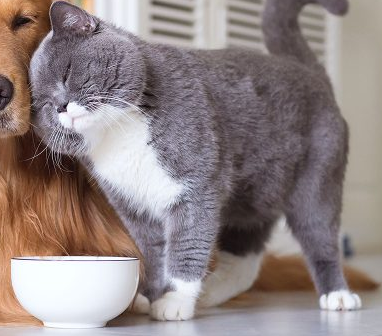

In [10]:
selectedobj = cv2.imread("a.jpg")[boxpix[1]:boxpix[3],boxpix[0]:boxpix[2]]
cv2_imshow(selectedobj)